In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

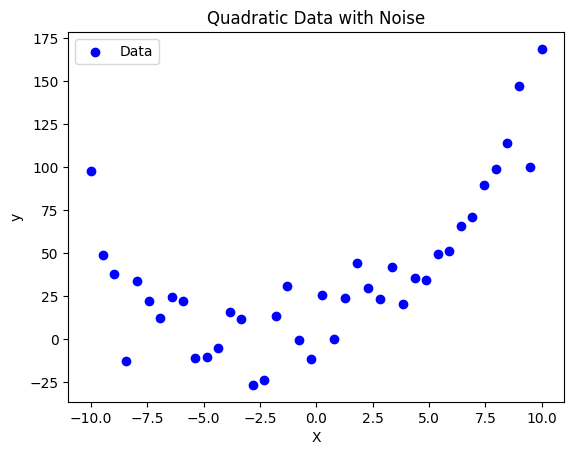

In [87]:
import matplotlib.pyplot as plt
# Generate dataset
np.random.seed(11)
X = np.linspace(-10, 10, 40)
y = 1 * X**2 + 4 * X + 3 + 2*np.random.normal(0, 10, size=X.shape)

# Plot the data
plt.scatter(X, y, color='blue', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Quadratic Data with Noise')
plt.legend()
plt.show()

/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/eatai/.pyenv/versions/datascien

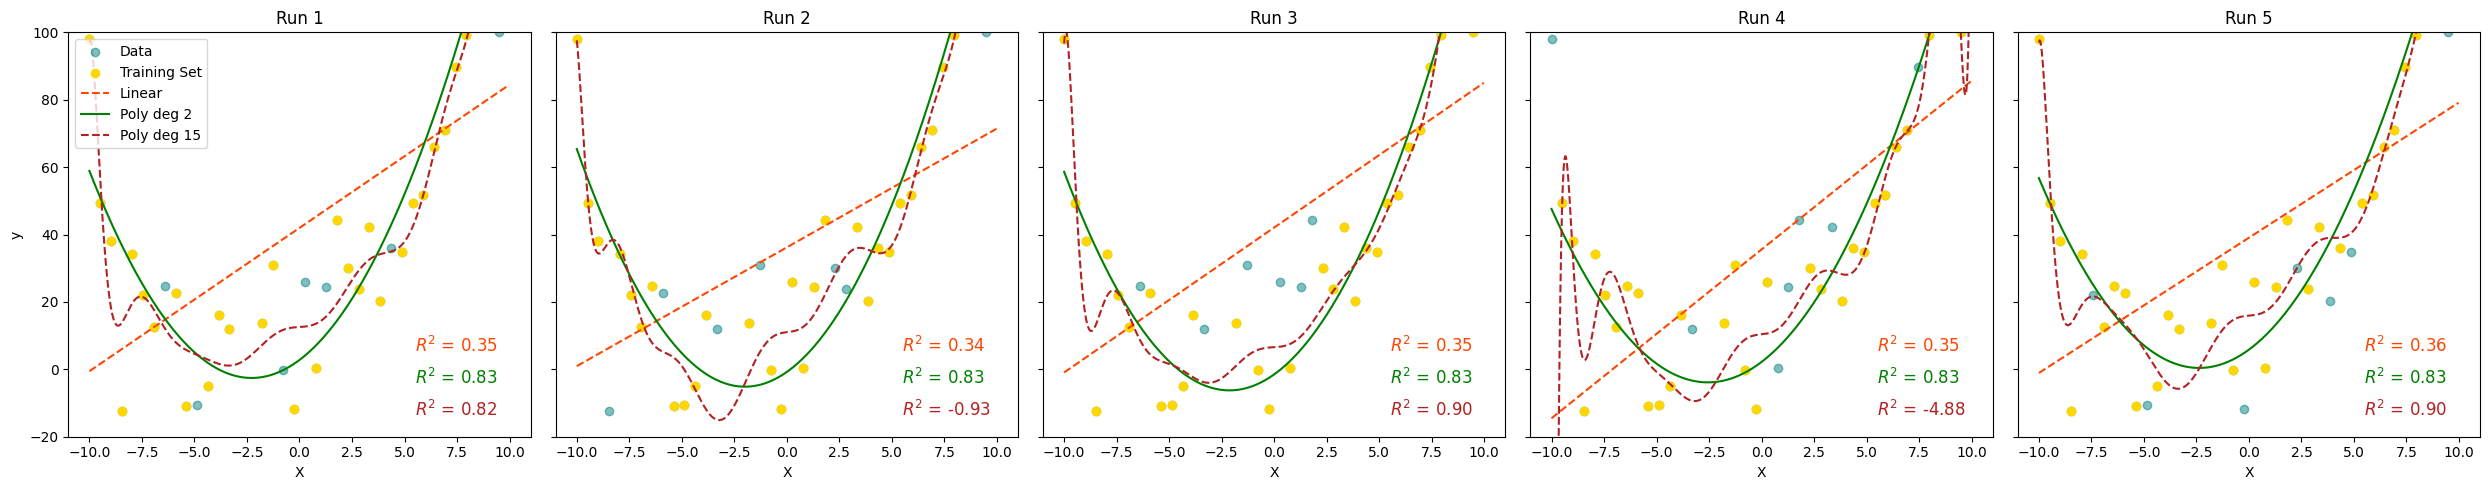

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True, sharex=True)
np.random.seed(42)  # For reproducibility

for i in range(5):
    # Random 50% split
    idx = np.random.choice(len(X), size=int(0.8*len(X)), replace=False)
    X_train, y_train = X[idx], y[idx]
    X_plot = np.arange(-10,10,0.02)  # For plotting the full curve

    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train.reshape(-1, 1), y_train)
    
    y_pred_lin = lin_reg.predict(X.reshape(-1, 1))
    y_lin = lin_reg.predict(X_plot.reshape(-1,1))
    coef_lin = lin_reg.coef_[0]
    intercept_lin = lin_reg.intercept_
    eqn_lin = f"y = {coef_lin:.2f}x + {intercept_lin:.2f}"

    # Polynomial Regression (degree 5)
    poly = PolynomialFeatures(degree=15)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_plot_poly = poly.fit_transform(X_plot.reshape(-1, 1))

    X_poly = poly.transform(X.reshape(-1, 1))
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    y_pred_poly = poly_reg.predict(X_poly)
    y_poly = poly_reg.predict(X_plot_poly)

    coefs = poly_reg.coef_
    intercept = poly_reg.intercept_
    eqn_poly = "y = " + " + ".join([f"{coefs[j]:.2e}x^{j}" if j > 0 else f"{intercept:.2e}" for j in range(6)])

    # Polynomial Regression (degree 2)
    poly2 = PolynomialFeatures(degree=2)
    X_train_poly2 = poly2.fit_transform(X_train.reshape(-1, 1))
    X_plot_poly2 = poly2.transform(X_plot.reshape(-1,1))
    X_poly2 = poly2.transform(X.reshape(-1, 1))
    
    poly2_reg = LinearRegression()
    poly2_reg.fit(X_train_poly2, y_train)
    
    y_pred_poly2 = poly2_reg.predict(X_poly2)
    y_poly2 = poly2_reg.predict(X_plot_poly2)
    coefs2 = poly2_reg.coef_
    intercept2 = poly2_reg.intercept_
    eqn_poly = "y = " + " + ".join([f"{coefs2[j]:.2e}x^{j}" if j > 0 else f"{intercept2:.2e}" for j in range(2)])
    
    # Plot
    ax = axes[i]
    ax.scatter(X, y, color='teal', alpha=0.5, label='Data')
    ax.scatter(X_train, y_train, color='gold', label='Training Set')
    ax.plot(X_plot, y_lin, color='orangered', linestyle = '--', label='Linear')
    ax.plot(X_plot, y_poly2, color='green', label='Poly deg 2')
    ax.plot(X_plot, y_poly, color='firebrick', linestyle = '--', label='Poly deg 15')
    
    ax.set_ylim([-20, 100])
    ax.set_title(f'Run {i+1}')
    ax.set_xlabel('X')
    if i == 0:
        ax.set_ylabel('y')
        ax.legend(loc='upper left')
    # Superimpose equations
    ax.text(0.75, 0.25, f'$R^2$ = {r2_score(y.reshape(-1,1), y_pred_lin.reshape(-1,1)):.2f}', transform=ax.transAxes, fontsize=12, color='orangered', verticalalignment='top')
    ax.text(0.75, 0.17, f'$R^2$ = {r2_score(y.reshape(-1,1), y_pred_poly2.reshape(-1,1)):.2f}', transform=ax.transAxes, fontsize=12, color='green', verticalalignment='top')
    ax.text(0.75, 0.09, f'$R^2$ = {r2_score(y.reshape(-1,1), y_pred_poly.reshape(-1,1)):.2f}', transform=ax.transAxes, fontsize=12, color='firebrick', verticalalignment='top')


plt.tight_layout()
plt.show()